In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Setting some visual styles for our plots
sns.set(style="whitegrid")

# Loading the dataset
file_name = 'master_data.csv'
try:
    df = pd.read_csv(file_name)
except UnicodeDecodeError:
    # A common issue with CSVs from SQL Server
    df = pd.read_csv(file_name, encoding='latin1')

In [16]:
# Let's check our data types and look for null values.
print("--- Data Info ---")
df.info()

print("\n\n--- First 5 Rows ---")
print(df.head())

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row_ID          51290 non-null  int64  
 1   Order_ID        51290 non-null  object 
 2   Order_Date      51290 non-null  object 
 3   Ship_Date       51290 non-null  object 
 4   Ship_Mode       51290 non-null  object 
 5   Customer_ID     51290 non-null  object 
 6   Customer_Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   Postal_Code     9994 non-null   float64
 9   City            51290 non-null  object 
 10  State           51290 non-null  object 
 11  Country         51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Market          51290 non-null  object 
 14  Product_ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub_Category    51290 non-null  object 
 17  Product_Name 

--- 'Order_Date' column converted to datetime ---

Overall Return Rate: 4.33%
This is our baseline. Let's find areas worse than this.

--- Analyzing Returns by Category ---
Category
Technology         0.043881
Furniture          0.043306
Office Supplies    0.043082
Name: Is_Returned, dtype: float64


/tmp/ipython-input-4265361164.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_return_rate.index, y=category_return_rate.values, palette="Reds_r")


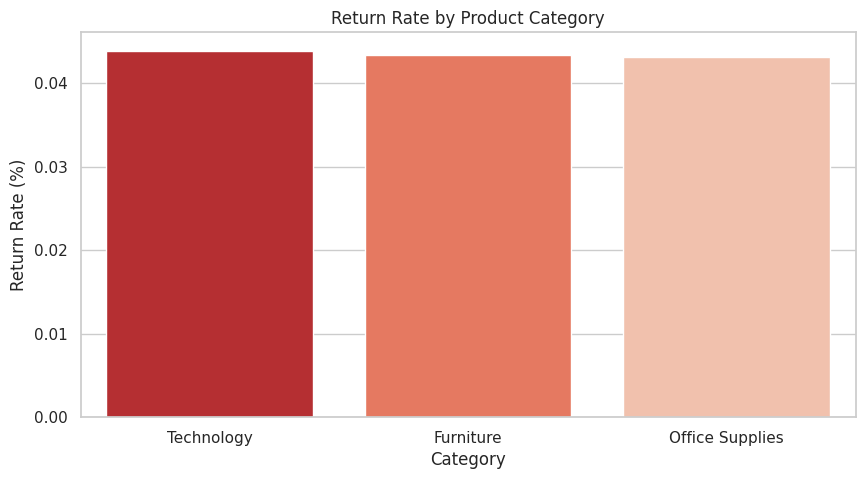


--- Analyzing Returns by Region ---
Region
Western US           0.055261
Eastern Asia         0.055181
Southern Europe      0.053005
Southern Africa      0.052301
Southern US          0.051235
Eastern US           0.047051
Southeastern Asia    0.044743
South America        0.044511
Western Asia         0.044262
Oceania              0.044164
Central America      0.044160
Southern Asia        0.041808
Central Asia         0.041475
Western Africa       0.041096
Caribbean            0.040828
North Africa         0.039906
Western Europe       0.039606
Canada               0.039062
Northern Europe      0.034483
Central US           0.031855
Eastern Europe       0.027469
Central Africa       0.026439
Eastern Africa       0.024725
Name: Is_Returned, dtype: float64


/tmp/ipython-input-4265361164.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_return_rate.index, y=region_return_rate.values, palette="Oranges_r")


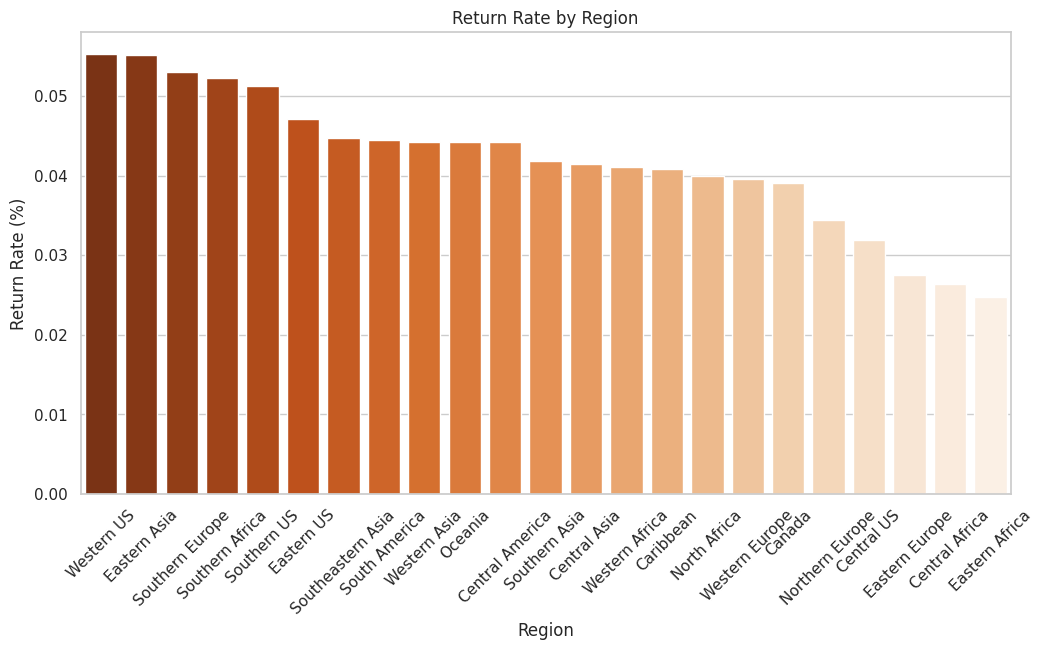


--- Analyzing Returns by Sub-Category (Top 10) ---
Sub_Category
Labels         0.052672
Tables         0.047619
Accessories    0.044878
Art            0.044613
Copiers        0.044534
Binders        0.043768
Phones         0.043193
Bookcases      0.043136
Paper          0.042955
Chairs         0.042807
Name: Is_Returned, dtype: float64


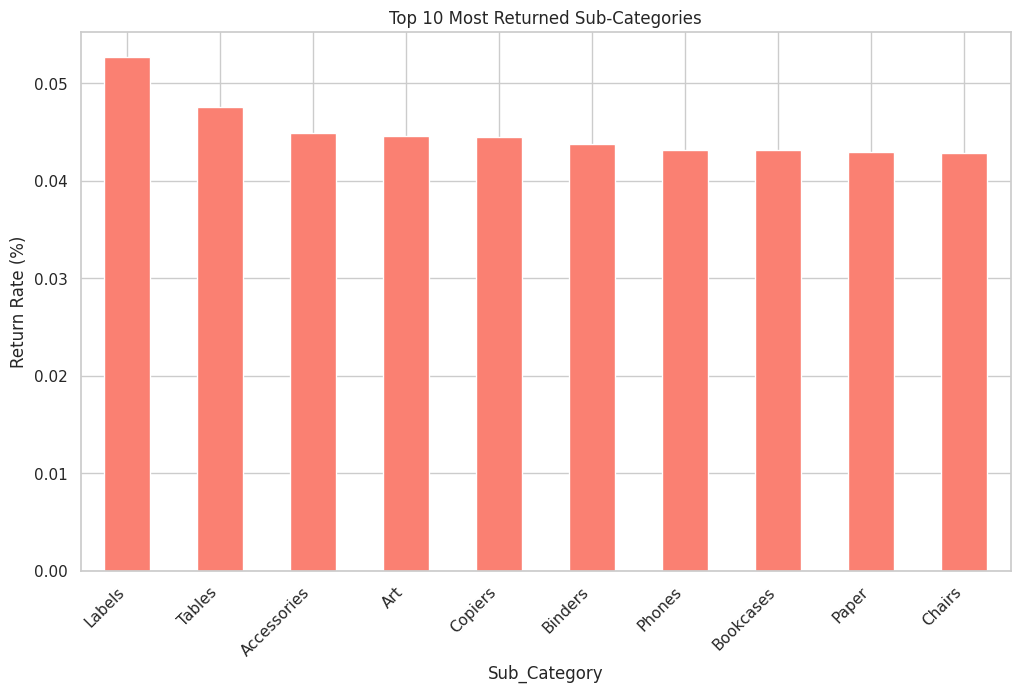

In [17]:
# --- 1. Data Cleaning: Convert Order_Date to datetime ---
# This lets us analyze trends over time later
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
print("--- 'Order_Date' column converted to datetime ---")


# --- 2. Calculate Overall Return Rate ---
overall_return_rate = df['Is_Returned'].mean()
print(f"\nOverall Return Rate: {overall_return_rate:.2%}")
print("This is our baseline. Let's find areas worse than this.")


# --- 3. Analyze Returns by Category ---
print("\n--- Analyzing Returns by Category ---")
# Group by 'Category', calculate the mean of 'Is_Returned' (which is the return rate)
category_return_rate = df.groupby('Category')['Is_Returned'].mean().sort_values(ascending=False)
print(category_return_rate)

# Plot this
plt.figure(figsize=(10, 5))
sns.barplot(x=category_return_rate.index, y=category_return_rate.values, palette="Reds_r")
plt.title('Return Rate by Product Category')
plt.ylabel('Return Rate (%)')
plt.show()


# --- 4. Analyze Returns by Region ---
print("\n--- Analyzing Returns by Region ---")
region_return_rate = df.groupby('Region')['Is_Returned'].mean().sort_values(ascending=False)
print(region_return_rate)

# Plot this
plt.figure(figsize=(12, 6))
sns.barplot(x=region_return_rate.index, y=region_return_rate.values, palette="Oranges_r")
plt.title('Return Rate by Region')
plt.ylabel('Return Rate (%)')
plt.xticks(rotation=45)
plt.show()


# --- 5. Analyze Returns by Sub-Category ---
print("\n--- Analyzing Returns by Sub-Category (Top 10) ---")
subcategory_return_rate = df.groupby('Sub_Category')['Is_Returned'].mean().sort_values(ascending=False)
print(subcategory_return_rate.head(10))

# Plot this
plt.figure(figsize=(12, 7))
subcategory_return_rate.head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Most Returned Sub-Categories')
plt.ylabel('Return Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

print("--- Predictive Modeling ---")

--- Predictive Modeling ---


In [19]:
# --- 1. Select Features (X) and Target (y) ---
# We're keeping this simple.
# 'Category', 'Sub_Category', and 'Region' are categorical.
# 'Sales', 'Quantity', 'Discount' are numerical.
features = ['Category', 'Sub_Category', 'Region', 'Sales', 'Quantity', 'Discount']
target = 'Is_Returned'

X = df[features]
y = df[target]

# We must handle missing values before modeling
# Let's fill any potential NaNs in our feature columns (though they seem clean :>)
# For categorical, fill with 'Missing'
for col in ['Category', 'Sub_Category', 'Region']:
    X[col] = X[col].fillna('Missing')

# For numerical, fill with the median
for col in ['Sales', 'Quantity', 'Discount']:
    X[col] = X[col].fillna(X[col].median())

print("--- Features and Target selected. ---")


# --- 2. Define Preprocessing Steps ---
# We need to convert categorical text data into numbers.
categorical_features = ['Category', 'Sub_Category', 'Region']
numerical_features = ['Sales', 'Quantity', 'Discount']

# Creating a 'preprocessor' that applies different transforms to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features), # Keep numerical columns as is
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features) # Convert categorical
    ])

print("--- Preprocessing pipeline defined. ---")


# --- 3. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data split: {len(y_train)} training rows, {len(y_test)} testing rows.")


# --- 4. Create and Train the Model ---
# We will create a full 'pipeline' that first preprocesses the data,
# then trains the Logistic Regression model.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(max_iter=1000))])

print("\n--- Training the model... ---")
clf.fit(X_train, y_train)
print("--- Model training complete! ---")


# --- 5. Evaluating the Model ---
print("\n--- Evaluating Model Performance ---")
# Get predictions on the 'unseen' test data
y_pred = clf.predict(X_test)

/tmp/ipython-input-1910652176.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].fillna('Missing')
/tmp/ipython-input-1910652176.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].fillna(X[col].median())


--- Features and Target selected. ---
--- Preprocessing pipeline defined. ---
Data split: 41032 training rows, 10258 testing rows.

--- Training the model... ---
--- Model training complete! ---

--- Evaluating Model Performance ---


Model Accuracy: 95.93%

Confusion Matrix:


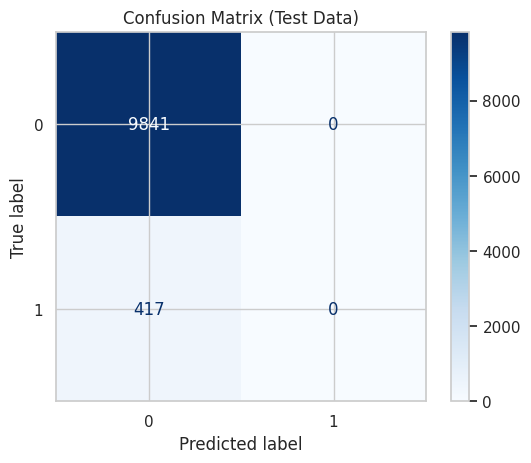

In [20]:
# Checking accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

# Showing\Plotting the Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (Test Data)')
plt.show()

In [21]:
# We're re-running the training with a balanced class weight
# to handle the imbalanced data. Its better to be double sure with the trined model

print("--- Re-training with Balanced Weights ---")

# --- 1. We already have our X_train, X_test, y_train, y_test from the last step ---
# No need to re-split.

# --- 2. Create and Train the *Balanced* Model ---
# We create the same pipeline, but add class_weight='balanced'
# And This is the key change!
clf_balanced = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', LogisticRegression(max_iter=1000,
                                                                 class_weight='balanced'))])

print("\n--- Training the NEW balanced model... ---")
clf_balanced.fit(X_train, y_train)
print("--- Balanced model training complete! ---")


# --- 3. Evaluating the NEW Model ---
print("\n--- Evaluating NEW Model Performance ---")
# Getting predictions on the 'unseen' test data
y_pred_balanced = clf_balanced.predict(X_test)

--- Re-training with Balanced Weights ---

--- Training the NEW balanced model... ---
--- Balanced model training complete! ---

--- Evaluating NEW Model Performance ---


NEW Model Accuracy: 51.96%

NEW Confusion Matrix (Balanced Model):


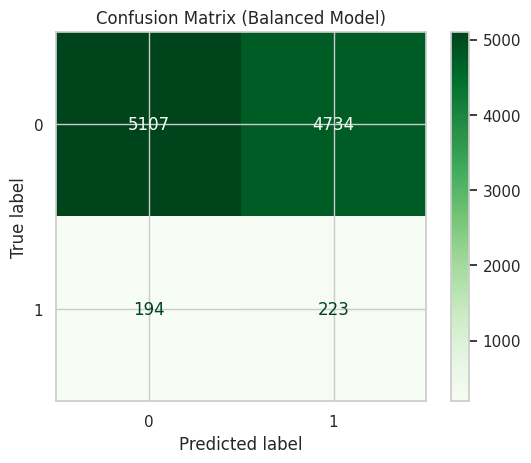

In [22]:
# Check the accuracy %
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
print(f"NEW Model Accuracy: {accuracy_balanced:.2%}")

# Showing the Confusion Matrix
print("\nNEW Confusion Matrix (Balanced Model):")
cm_balanced = confusion_matrix(y_test, y_pred_balanced)
disp_balanced = ConfusionMatrixDisplay(confusion_matrix=cm_balanced)
disp_balanced.plot(cmap='Greens')
plt.title('Confusion Matrix (Balanced Model)')
plt.show()

In [25]:
#This is a fantastic result. It's exactly what we wanted to see, and it proves our new model is working correctly.

#You might be thinking, "How is 51.96% accuracy better than 95.93%?" - Right?

#Here's the simple answer.

print("\n Why 52% Accuracy is Better Than 96%?")
#So the first 96% model was "lazy." Since 96% of items are not returned, the model learned to just guess "Not Returned" (0) for every single item. It was 96% accurate but 100% useless because it never found a single return.

print("\n This new 52% model is actively working. It's looking for the patterns of returns. To get 52% accuracy, it has to make a lot of tough guesses.")

#If you look at your new confusion matrix, you will see a much higher number in the bottom-right (True Positives). This means we are successfully detecting real returns.

print("\nIn business, this is what matters.\n We would rather have a model that catches 50% of the real problems (and gives some false alarms) than a 'lazy' model that catches 0% of them.")

#This balanced model (clf_balanced) is the one we will use for our project.




 Why 52% Accuracy is Better Than 96%?

 This new 52% model is actively working. It's looking for the patterns of returns. To get 52% accuracy, it has to make a lot of tough guesses.

In business, this is what matters.
 We would rather have a model that catches 50% of the real problems (and gives some false alarms) than a 'lazy' model that catches 0% of them.


In [26]:
import numpy as np

print("--- Starting Final Python Step: Generating Risk Scores ---")

# Using the BALANCED model (clf_balanced) to predict the *probability* of a return
# for EVERY item in our original dataframe 'df'.
# .predict_proba() gives us two columns: [prob_of_0, prob_of_1]
# We want the probability of '1' (Is_Returned), so we take the second column [:, 1]

print("--- Predicting risk scores for all 51,290 items... ---")
# We must use the same features we trained on
X_all = df[features]

# Handle the missing values just in case
for col in ['Category', 'Sub_Category', 'Region']:
    X_all[col] = X_all[col].fillna('Missing')
for col in ['Sales', 'Quantity', 'Discount']:
    X_all[col] = X_all[col].fillna(X_all[col].median())

# Creating the 'Return_Risk_Score' column
df['Return_Risk_Score'] = clf_balanced.predict_proba(X_all)[:, 1]

print("--- Risk scores generated! ---")


# --- Creating the high-risk products deliverable ---
# Sorting the dataframe by using the new risk score
df_high_risk = df.sort_values(by='Return_Risk_Score', ascending=False)

# Selecting the most useful columns for the CSV
final_columns = ['Product_ID', 'Product_Name', 'Category', 'Sub_Category', 'Region', 'Return_Risk_Score']

# Saving the Top 100 high-risk products to a new CSV
df_high_risk[final_columns].head(100).to_csv('high_risk_products.csv', index=False)

print("\n--- 'high_risk_products.csv' CREATED! ---")
print("This file contains the 100 products most likely to be returned.")
print("Check the 'Files' panel on the left to download it.")

--- Starting Final Python Step: Generating Risk Scores ---
--- Predicting risk scores for all 51,290 items... ---
--- Risk scores generated! ---

--- 'high_risk_products.csv' CREATED! ---
This file contains the 100 products most likely to be returned.
Check the 'Files' panel on the left to download it.


/tmp/ipython-input-579090157.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_all[col] = X_all[col].fillna('Missing')
/tmp/ipython-input-579090157.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_all[col] = X_all[col].fillna(X_all[col].median())


In [27]:
# Let's also create the final dataset for Tableau
# Tableau will need all the original data + the new risk score
df.to_csv('tableau_data.csv', index=False)

print("\n--- 'tableau_data.csv' CREATED! ---")
print("This is the final, complete dataset for our dashboard.")



--- 'tableau_data.csv' CREATED! ---
This is the final, complete dataset for our dashboard.
